# 2. Flow visualization results

### Description : Flow visualisation is important when assessing a flow field and is helpful in better understanding of the flow charactorestics. Streamlines, Pathlines and Streaklines are introduced in thie excercise. The first part deals with defining, setting up and visualizing a vector field. Here it represents a steady flow, more precisely a pure rotational field. In-built streamline plot has also underlying numerical approximation due to which the streamline is instead of a circle (analytical solution) a spiral. Isocontours are used to show the velocity magnitude.Numerical integration methods are implemented to show the differences for pathline calculation. This follows the Lagrangian view, i.e. particle tracking. While the flow domain is defined by a vector field independent of time, i.e. steady, the particles in the flow have a changing velocity as this depends by definition on the position.Some exercises are proposed. 
#### The students are advised to complete the exercises. 

Project : Lecture - Structural Wind Engineering WS18-19 
        Chair of Structural Analysis @ TUM - A. Michalski, R. Wuchner, M. Pentek
        
Author : kodakkal.anoop@tum.de mate.pentek@tum.de

In [1]:
# import
import time
import matplotlib.pyplot as plt
import numpy as np
import sympy 
from matplotlib import pyplot as plt

#### Symbolic vector calculus

using the symbolic toolbox to define and display the velocity field u.

In [2]:
x = sympy.Symbol('x')
y = sympy.Symbol('y')
z = sympy.Symbol('z')
t = sympy.Symbol('t')

Lets define each component of the velocity field. 

In [3]:
symbolicVelocityX = -2 #* y
symbolicVelocityY = 2 #* x
symbolicVelocityZ = 0
print('u = [',symbolicVelocityX,' ',symbolicVelocityY,' ',symbolicVelocityZ,']')

u = [ -2   2   0 ]


###### For exercise 01
Try for different velocity field. 

In [4]:
# symbolicVelocityX = 2
# symbolicVelocityY = 2
# symbolicVelocityZ = 0
# print('u = [',symbolicVelocityX,' ',symbolicVelocityY,' ',symbolicVelocityZ,']')

### calculation of  divergence and curl


#### Two key operators in vector calculus are divergence and curl. Recall from lecture the definitions of these two quantities. What does these two quantities signify ?  

Divergence signifies how a vector field changes its magnitude in the neighborhood of a point, and curl is an indicator of how its direction changes.

In [5]:
symbolicDiv = sympy.diff(symbolicVelocityX,x) + sympy.diff(symbolicVelocityY,y) + sympy.diff(symbolicVelocityZ,z);
print('div(u)= ',symbolicDiv)

div(u)=  0


In [6]:
symbolicCurlX = sympy.diff(symbolicVelocityZ,y)-sympy.diff(symbolicVelocityY,z)
symbolicCurlY = sympy.diff(symbolicVelocityX,z)-sympy.diff(symbolicVelocityZ,x)
symbolicCurlZ = sympy.diff(symbolicVelocityY,x)-sympy.diff(symbolicVelocityX,y)
print('curl(u) = [',symbolicCurlX,' ',symbolicCurlY,' ',symbolicCurlZ,']')
print(' ')

curl(u) = [ 0   0   0 ]
 


### Vector Field  visualization

We need to generate a grid for visualizing. 

In [7]:

# give grid size parameters
gridSpacingStart = -2
gridSpacingEnd = 2
gridSpacingSize = 0.4

# generate grid size vectors 1D
xGridSpacing = np.arange(gridSpacingStart, gridSpacingEnd+gridSpacingSize, gridSpacingSize) 
yGridSpacing = np.arange(gridSpacingStart, gridSpacingEnd+gridSpacingSize, gridSpacingSize) 

xMeshGrid, yMeshGrid = np.meshgrid(xGridSpacing, yGridSpacing)

# define components and generate vector field components for the 2D
# meshgrid field
# Ux = -2 * y
# Uy = 2 * x
velocityXOnMeshGrid = -2 * yMeshGrid #xMeshGrid - yMeshGrid
velocityYOnMeshGrid  = 2 * xMeshGrid #xMeshGrid + yMeshGrid#

Refer to [mesh grid](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.meshgrid.html) for more details on mesh grid function on numpy 

##### Lets plot the vector field to visualize 

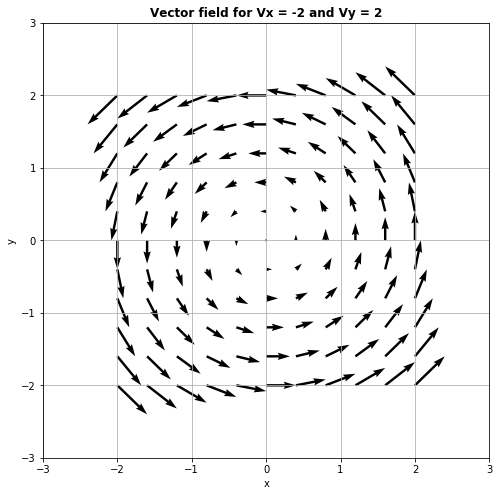

In [8]:

plt.figure(figsize=(8, 8))
plt.title('Vector field for Vx = '+str(symbolicVelocityX)+' and Vy = '+str(symbolicVelocityY), fontweight='bold')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(gridSpacingStart-1, gridSpacingEnd+1)
plt.ylim(gridSpacingStart-1, gridSpacingEnd+1)
plt.quiver(xMeshGrid,yMeshGrid,velocityXOnMeshGrid,velocityYOnMeshGrid,angles='xy',scale_units='xy',scale=10)
#plt.axis('equal')
plt.grid()

### Exercise 01 : Visualizing different fields 

Try to visualize following vector fields and compute their divergence and curl, is there a correlation between these quantities and the vector fields ? 

1. constant u = [ 2, 2, 0 ]
2. constant u = [ 2, -2, 0 ]
3. u = [ x, y, 0 ]
4. u = [ 2y, -2x, 0 ]
5. u = [ x-y, x+y, 0 ]

### Streamline visualization 


using the inbuilt function of [streamline](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.streamplot.html) to plot the streamlines 

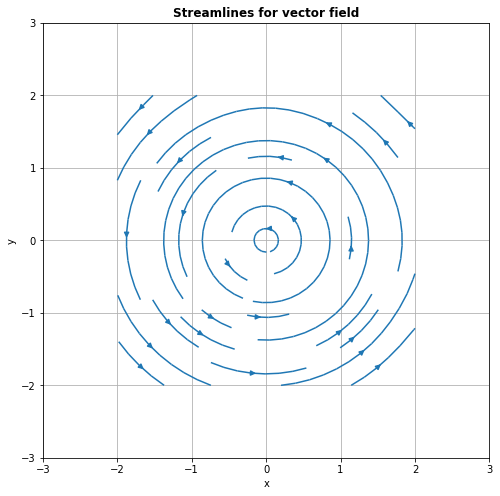

In [9]:
plt.figure(figsize=(8, 8))
plt.streamplot(xMeshGrid,yMeshGrid,velocityXOnMeshGrid,velocityYOnMeshGrid, density= 0.5)
plt.title('Streamlines for vector field', fontweight='bold')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([gridSpacingStart-1, gridSpacingEnd+1])
plt.ylim([gridSpacingStart-1, gridSpacingEnd+1])
plt.grid(True)

### Contour plot for velocity magnitude


Velocity magnitude $ \mid U\mid= \sqrt{U_x^2 + U_y^2}$

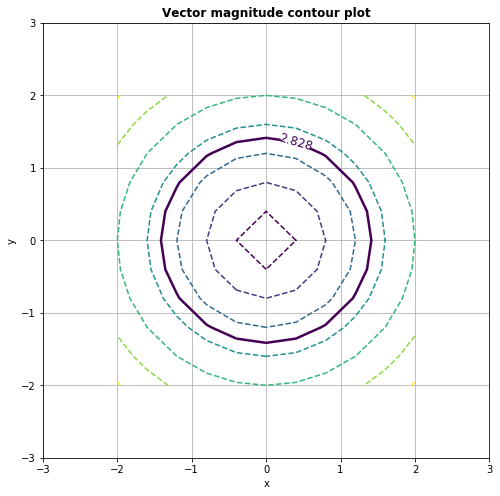

In [10]:
velMagnitudeMeshGrid = np.power(((np.square(velocityXOnMeshGrid) + np.square(velocityYOnMeshGrid))),0.5)

# plot separately contour line for magnitude of velocity for initial point
# x0 = 1, y0 = 1 -> looking for magnitude Ux(x0=1)= -2 and Uy(y0=1) = 2
# magnitude is 2*sqrt(2) = 2.8284
valLookedFor = np.sqrt((-2*1)**2 + (2*1)**2)

# plot first plot line of interest 
# after plot contours lines dashed 
plt.figure(figsize=(8, 8))
CS = plt.contour(xMeshGrid, yMeshGrid, velMagnitudeMeshGrid,levels = [valLookedFor], linewidths= 2.5)
plt.clabel(CS, inline=1, fontsize=12)
plt.contour(xMeshGrid, yMeshGrid, velMagnitudeMeshGrid,linestyles='dashed',linewidths=1.5)
plt.title('Vector magnitude contour plot', fontweight='bold')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([gridSpacingStart-1, gridSpacingEnd+1])
plt.ylim([gridSpacingStart-1, gridSpacingEnd+1])
plt.grid(True)

### Pathline 

Pathlines are actual paths traveled by each particle.  
$$ x = x_{start} + \int_{t_{start}} ^{t}{u dt }$$

###### Here, the particle is introduced into flow at time $ t = 0$ at position $x(t=0) = 1 $ and $ y(t=0) = 1$

We follow this particle in time and evaluate the pathline. The pathline evaluation requires approximation of position (distance) by numerically integrating the given (known) velocity.
$$ U_x = \frac {dx} {dt} \rightarrow dx = U_x * dt$$

This is solved by different integration schemes.


##### 1. A forward Euler integration 


check out [Euler integration](https://en.wikipedia.org/wiki/Euler_method) for details 


#### Creating the time instances as an array

The start time, end time and the number of time steps are specified here for generating the time series. 

In [11]:
# start time
startTime = 0.0
# end time
endTime = np.pi
#delta time
deltaT = 0.1   
# time step
n = round((endTime-startTime)/deltaT)
# time array
timeT = np.linspace(startTime,endTime,n)

endTime is chosen as $\pi$ so that the particle will come back to its initial position. recall the fact the pathlines and streamlines are same for a steady flow. 

The pathline is evaluated using a forward Euler scheme. The pathline length, x and y coordinates are stored at each time steps. 

In [12]:
# empty values
xCoord = np.zeros(len(timeT))
yCoord = np.zeros(len(timeT))
# initial position
xCoord[0] = 1   
yCoord[0] = 1

# length set to zero
pathlineLength = 0

# defining the velocity as a function
# in matlab on can define with the lambda placeholder for variables
# velocities defined generically as functions depending on x,y,t 
velocityX = lambda t,x,y: - 2 * y
velocityY = lambda t,x,y: 2 * x

# calculation loop for forward Euler
# x(i) = x(i-1) + Vx(i-1)*deltat
# y(i) = y(i-1) + Vy(i-1)*deltat
for i in range(0,len(timeT)-1):                             
    xCoord[i+1] = xCoord[i] + velocityX((timeT[i]+deltaT),(xCoord[i]),(yCoord[i]))*deltaT
    yCoord[i+1] = yCoord[i] + velocityY((timeT[i]+deltaT),(xCoord[i]),(yCoord[i]))*deltaT  
    
    pathlineLength = pathlineLength + (np.sqrt((xCoord[i+1]-xCoord[i])**2 + (yCoord[i+1]-yCoord[i])**2)) 

# store results under new name to be more specific
xCoordEuler = xCoord
yCoordEuler = yCoord
pathlineLengthEuler = pathlineLength

##### 2. 4th order Runga-Kutta (RK-4) integration 


check out [ Runga-Kutta (RK-4)](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#Examples) for details 


In [13]:

# empty values
xCoord = np.zeros(len(timeT))
yCoord = np.zeros(len(timeT))
# initial position
xCoord[0] = 1   
yCoord[0] = 1

# length set to zero
pathlineLength = 0
for i in range(0,len(timeT)-1):
    k_1 = velocityX(timeT[i],xCoord[i],yCoord[i])
    k_2 = velocityX(timeT[i]+0.5*deltaT,xCoord[i]+0.5*deltaT*k_1,yCoord[i]+0.5*deltaT*k_1)
    k_3 = velocityX((timeT[i]+0.5*deltaT),xCoord[i]+0.5*deltaT*k_2,yCoord[i]+0.5*deltaT*k_2)
    k_4 = velocityX((timeT[i]+deltaT),xCoord[i]+k_3*deltaT,yCoord[i]+k_3*deltaT)
     
    xCoord[i+1] = xCoord[i] + (1.0/6.0)*(k_1+2*k_2+2*k_3+k_4)*deltaT  
     
    k_1 = velocityY(timeT[i],xCoord[i],yCoord[i])
    k_2 = velocityY(timeT[i]+0.5*deltaT,xCoord[i]+0.5*deltaT*k_1,yCoord[i]+0.5*deltaT*k_1)
    k_3 = velocityY((timeT[i]+0.5*deltaT),xCoord[i]+0.5*deltaT*k_2,yCoord[i]+0.5*deltaT*k_2)
    k_4 = velocityY((timeT[i]+deltaT),xCoord[i]+k_3*deltaT,yCoord[i]+k_3*deltaT)
    
    yCoord[i+1] = yCoord[i] + (1.0/6.0)*(k_1+2*k_2+2*k_3+k_4)*deltaT  
    
    pathlineLength = pathlineLength + (np.sqrt((xCoord[i+1]-xCoord[i])**2 + (yCoord[i+1]-yCoord[i])**2)) 

# store results under new name to be more specific
xCoordRK4 = xCoord
yCoordRK4 = yCoord
pathlineLengthRK4 = pathlineLength

##### 3. Adams-Bashforth


check out [ Adams-Bashforth](https://en.wikipedia.org/wiki/Linear_multistep_method#Two-step_Adams%E2%80%93Bashforth) for details 


In [14]:
# empty values
xCoord = np.zeros(len(timeT))
yCoord = np.zeros(len(timeT))
# initial position
xCoord[0] = 1   
yCoord[0] = 1

# length set to zero
pathlineLength = 0

# predict first step with Euler as Adams-Bashforth needs more information to
# start because the method depends on 2 previous values (positions) of x
# and y
# note that it introduces an inital error, one could substitute it with RK4
# to predict instead and reduce the error
xCoord[1] = xCoord[0] + velocityX((timeT[0]+deltaT),(xCoord[0]),(yCoord[0]))*deltaT
yCoord[1] = yCoord[0] + velocityY((timeT[0]+deltaT),(xCoord[0]),(yCoord[0]))*deltaT

pathlineLength = pathlineLength + (np.sqrt((xCoord[1]-xCoord[0])**2 + (yCoord[1]-yCoord[0])**2)) 
for i in range(0+1,len(timeT)-1):                            
    xCoord[i+1] = xCoord[i] + 3.0/2.0 * velocityX((timeT[i]+deltaT),(xCoord[i]),(yCoord[i]))*deltaT - 1.0/2.0 * velocityX((timeT[i-1]+deltaT),(xCoord[i-1]),(yCoord[i-1]))*deltaT; 
    yCoord[i+1] = yCoord[i] + 3.0/2.0 * velocityY((timeT[i]+deltaT),(xCoord[i]),(yCoord[i]))*deltaT - 1.0/2.0 * velocityY((timeT[i-1]+deltaT),(xCoord[i-1]),(yCoord[i-1]))*deltaT; 

    pathlineLength = pathlineLength + (np.sqrt((xCoord[i+1]-xCoord[i])**2 + (yCoord[i+1]-yCoord[i])**2)) 

# store results under new name to be more specific
xCoordAB = xCoord
yCoordAB = yCoord
pathlineLengthAB = pathlineLength

##### 4. exact solution


The exact analytic value for particles is a circle as the corresponding pathline/streamline are the same

In [15]:
#radius
r = np.sqrt((1)**2 + (1)**2)
#parametric time steps
th = np.linspace(0,2*np.pi,1000)
#center of circle a,b
a = 0
b = 0
#point on the circle
xCoord = r * np.cos(th) + a
yCoord = r * np.sin(th) + b

# store results under new name to be more specific
xCoordExact = xCoord
yCoordExact = yCoord
pathlineLengthExact = 2 * np.pi * r


##### Lets plot the pathline 

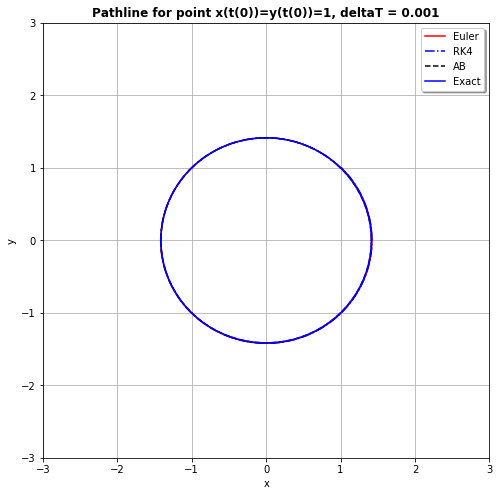

In [16]:
plt.figure(figsize=(8, 8))
plt.title('Pathline for point x(t(0))=y(t(0))=1, deltaT = ' + str(round(deltaT,3)), fontweight='bold')
plt.plot(xCoordEuler,yCoordEuler,'-r', label='Euler')
plt.plot(xCoordRK4,yCoordRK4,'-.b', label='RK4')
plt.plot(xCoordAB,yCoordAB,'--k', label='AB')
plt.plot(xCoordExact,yCoordExact,'-b', label='Exact')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([gridSpacingStart-1, gridSpacingEnd+1])
plt.ylim([gridSpacingStart-1, gridSpacingEnd+1])
plt.legend(loc='upper right', shadow=True)
plt.grid(True)

Lets zoom to point [1,1] 

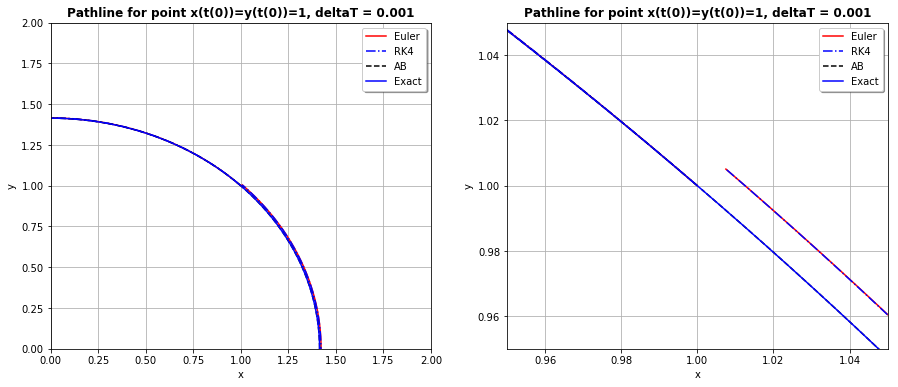

In [17]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.title('Pathline for point x(t(0))=y(t(0))=1, deltaT = ' + str(round(deltaT,3)), fontweight='bold')
plt.plot(xCoordEuler,yCoordEuler,'-r', label='Euler')
plt.plot(xCoordRK4,yCoordRK4,'-.b', label='RK4')
plt.plot(xCoordAB,yCoordAB,'--k', label='AB')
plt.plot(xCoordExact,yCoordExact,'-b', label='Exact')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0, 2])
plt.ylim([0, 2])
plt.legend(loc='upper right', shadow=True)
plt.grid(True)

plt.subplot(1,2,2)
plt.title('Pathline for point x(t(0))=y(t(0))=1, deltaT = ' + str(round(deltaT,3)), fontweight='bold')
plt.plot(xCoordEuler,yCoordEuler,'-r', label='Euler')
plt.plot(xCoordRK4,yCoordRK4,'-.b', label='RK4')
plt.plot(xCoordAB,yCoordAB,'--k', label='AB')
plt.plot(xCoordExact,yCoordExact,'-b', label='Exact')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0.95, 1.05])
plt.ylim([0.95, 1.05])
plt.legend(loc='upper right', shadow=True)
plt.grid(True)


###### What do you observe with different integration schemes ?

Lets compare the pathline length for different integration schemes 

In [18]:
print('Pathline length comparison for dt= ',str(round(deltaT,3)))
print('Euler: ',str(round(pathlineLengthEuler,3)))
print('RK4: ',str(round(pathlineLengthRK4,3)))
print('AB: ',str(round(pathlineLengthAB,3)))
print('Exact: ',str(round(pathlineLengthExact,3)))

Pathline length comparison for dt=  0.001
Euler:  8.912
RK4:  8.912
AB:  8.884
Exact:  8.886


###### What do you observe with different integration schemes ?

### Exercise 03 : Effect of time step

Reduce the time step to deltaT to 0.01. Observe the differences and comment. Modify to 0.001

### Exercise 03 : Modify the velocity field

Redefine the velocity field as u = [1 x 0] and observe differences.

### Exercise 04 : Modify the velocity field

Redefine the velocity field as u = [-2yt 2xt 0] and observe differences.You should have an updating vector plot with time, also the streamlines will be time-dependent. For each time instance there will be new streamlines for the whole field.

### Exercise 04 : Streak lines

For the initial velocity field u = [-2y 2x 0] implement on your own the functionality for calculating streaklines.This is the family of pathlines defined before (connecting all the particles i which are released into the field at position x(t=i)=1 and y(t=i)=1) for a succsession of initial times ti0.       